In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

c:\users\viacheslav_bobrov\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


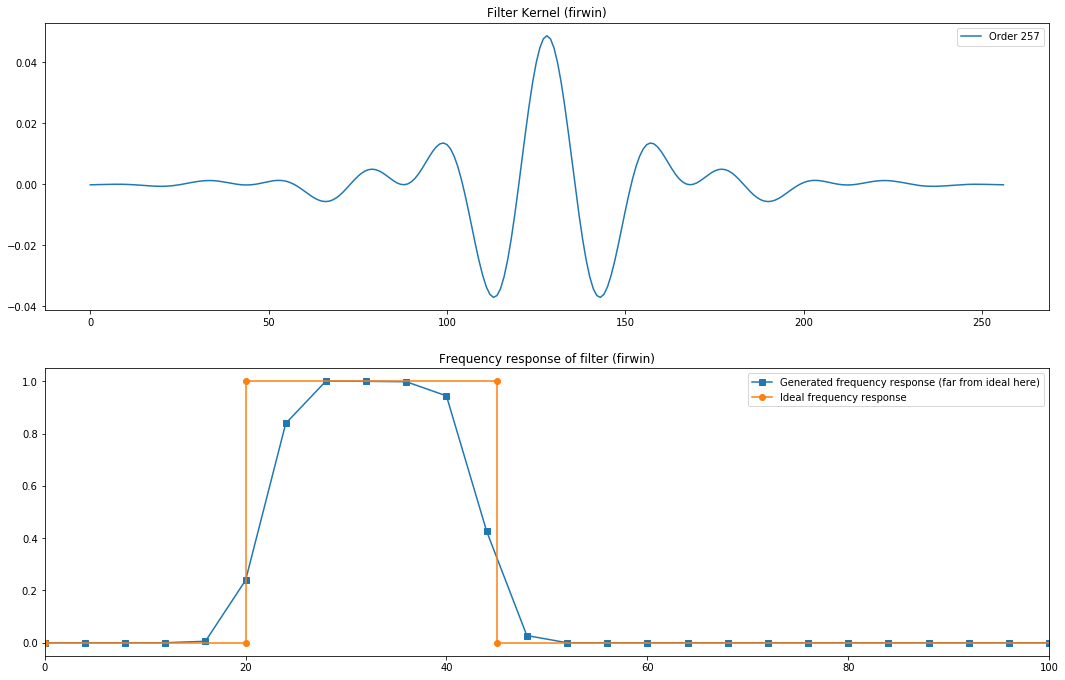

In [13]:
sampling_rate = 1024
nyquist_rate = sampling_rate / 2
filter_range = [20, 45]
transition_width = 0.1  # 10%

# The larger the order, the larger is the kernel
order = round(5 * sampling_rate / filter_range[0])  # 5 times of lower edge of range  (20)

# order must be odd for scipy.signal.firls to work
if order % 2 == 0: order += 1

filtering_kernel = signal.firwin(order, filter_range, fs=sampling_rate, pass_zero=False)

filter_power = abs(np.fft.fft(filtering_kernel)) ** 2
hz_axis = np.linspace(0, nyquist_rate, np.floor(len(filtering_kernel) / 2) + 1)
filter_power = filter_power[:len(hz_axis)]

# Plotting
plt.figure(figsize=(18, 18))
plt.subplot(311)
plt.plot(filtering_kernel, label='Order {0}'.format(order))
plt.title('Filter Kernel (firwin)')
plt.legend()

plt.subplot(312)
ideal_x_axis = [0, filter_range[0], filter_range[0], filter_range[1], filter_range[1], nyquist_rate]
ideal_y_axis = [0, 0, 1, 1, 0, 0]

plt.plot(hz_axis, filter_power, 's-', label='Generated frequency response (far from ideal here)')
plt.plot(ideal_x_axis, ideal_y_axis, 'o-', label='Ideal frequency response')
plt.xlim([0, 100])
plt.title('Frequency response of filter (firwin)')
plt.legend()


# Effects of the filter kernel order

In [14]:
# EFFECTS OF THE FILTER KERNEL ORDER


# Range of orders
order_first = round(1 * sampling_rate / filter_range[0])
order_last = round(15 * sampling_rate / filter_range[0])

orders = np.linspace(order_first, order_last, 10).astype(int)


<Figure size 1080x504 with 0 Axes>

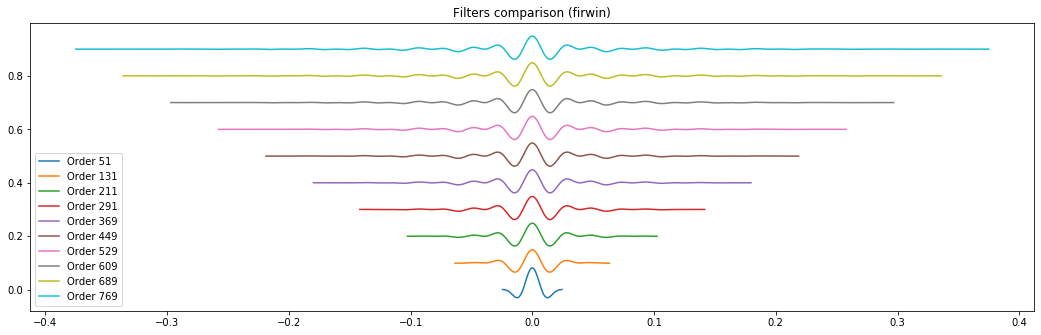

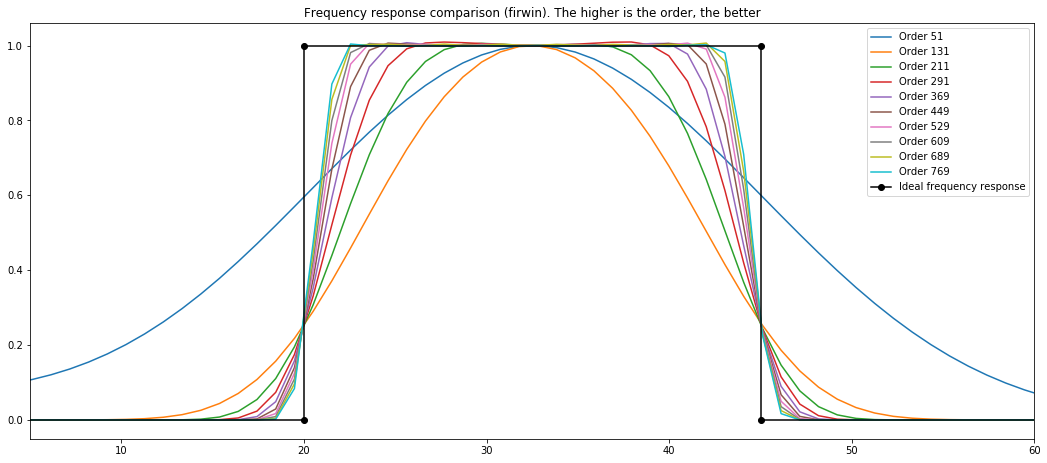

In [15]:
plt.figure(figsize=(15, 7))

filter_powers = np.zeros((len(orders), 1000))
hz_axis = np.linspace(0, sampling_rate, 1000)

plt.figure(figsize=(18, 18))
plt.subplot(311)
for i in range(len(orders)):
    # make sure order is odd-length
    order_to_use = orders[i] + (1 - orders[i] % 2)
    filtering_kernel_i = signal.firwin(order_to_use, filter_range, fs=sampling_rate, pass_zero=False)

    filter_powers[i, :] = abs(np.fft.fft(filtering_kernel_i, 1000)) ** 2  # 1000 - size of array to return
    time = np.arange(0, order_to_use) / sampling_rate
    time = time - np.mean(time)
    plt.plot(time, filtering_kernel_i + i * 0.1, label='Order {0}'.format(order_to_use))
plt.legend()
plt.title('Filters comparison (firwin)')

plt.figure(figsize=(18, 26))
plt.subplot(312)
for i in range(len(orders)):
    order_to_use = orders[i] + (1 - orders[i] % 2)
    plt.plot(hz_axis, filter_powers[i], label='Order {0}'.format(order_to_use))
plt.plot(ideal_x_axis, ideal_y_axis, 'ko-', label='Ideal frequency response')
                                    
plt.xlim([5, 60])
plt.title('Frequency response comparison (firwin). The higher is the order, the better')
plt.legend()


# Effects of the filter transition width